In [2]:
#12/8/24 For the creation of figures and other graphs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math
sys.path.insert(1, '/Users/james/Documents/Honours/Python') 
from Function_Repo import setbalance
import math

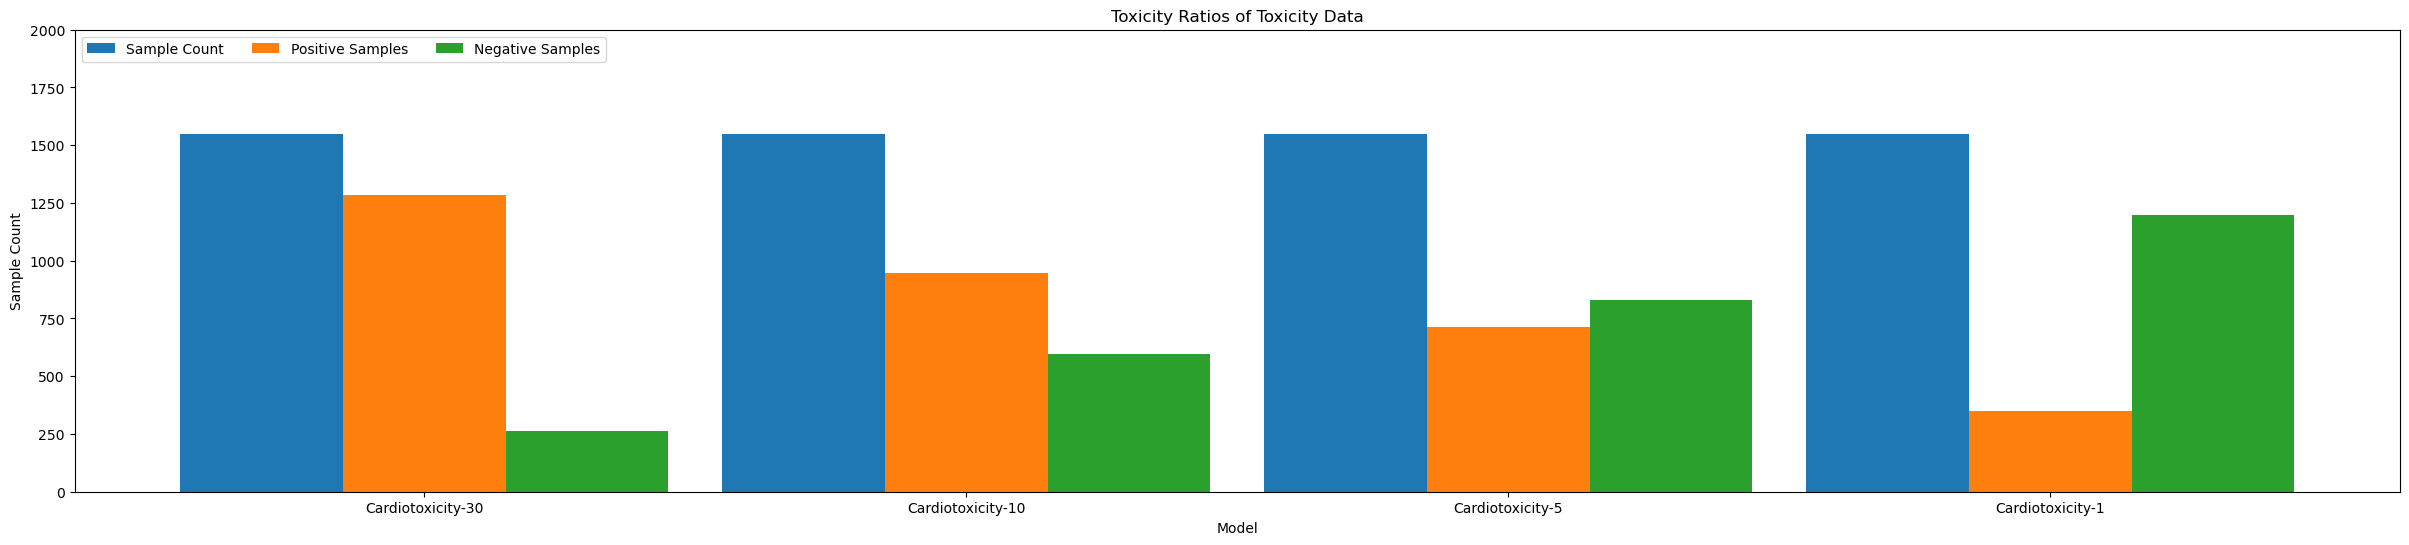

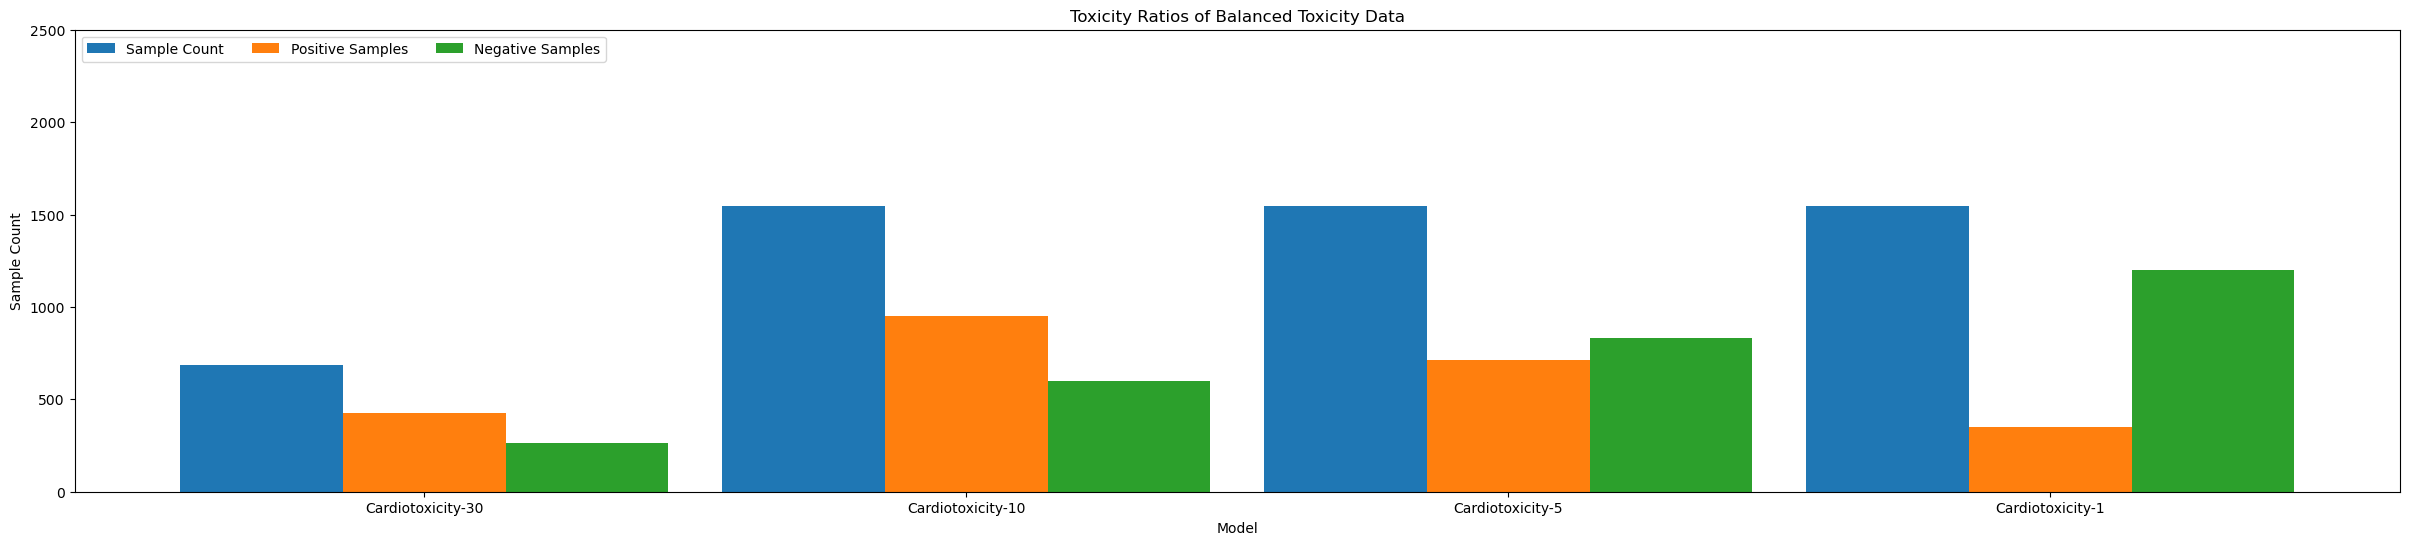

In [8]:
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
namelist = []
toxvals = []
btoxvals = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename and 'ardio' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        temp = df['Toxicity_Value'].values
        toxvals.append(temp)
        datasets.append(df)
        namelist.append(filename[:-4])
        
        baltox = setbalance(df)
        btoxvals.append(baltox['Toxicity_Value'].values)
        
poslist = []
neglist = []
totlist = []

for data in toxvals:
    pos = 0
    neg = 0
    for item in data:
        if item == 1:
            pos +=1 
        else:
            neg += 1
    totlist.append(pos + neg)
    poslist.append(pos)
    neglist.append(neg)

data = [totlist, poslist, neglist]

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(namelist))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(30, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=models[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Count')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Toxicity Data')
ax.set_xticks(x + width, namelist)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2000)

plt.show()

bposlist = []
bneglist = []
btotlist = []

for data in btoxvals:
    pos = 0
    neg = 0
    for item in data:
        if item == 1:
            pos +=1 
        else:
            neg += 1
    btotlist.append(pos + neg)
    bposlist.append(pos)
    bneglist.append(neg)

data = [btotlist, bposlist, bneglist]

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(namelist))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(30, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=models[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Count')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, namelist)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2500)

plt.show()

In [14]:
namelist

['Cardiotoxicity-30',
 'NR-AR-LBD',
 'Hepatotoxicity',
 'SR-ARE',
 'Respiratory_Toxicity',
 'NR-AhR',
 'SR-p53',
 'Reproductive_Toxicity',
 'NR-ER',
 'SR-HSE',
 'SR-MMP',
 'SR-ATAD5',
 'NR-PPAR-gamma',
 'Carcinogenicity',
 'NR-ER-LBD',
 'Cardiotoxicity-10',
 'Cardiotoxicity-5',
 'NR-aromatase',
 'Developmental_Toxicity',
 'Ames_Mutagenicity',
 'NR-AR',
 'Cardiotoxicity-1']